In [2]:
#Import the Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter Api Credentials
consumerKey = "LrSxpWHRWjwa2h8R4SQOZJUIV"
consumerSecret = "8d3xWVMKm6LpXDIbZW930I5eiH0kb0jhtNr8pvSHkABm63qPh9"
accessToken = "1334421915549585408-8HocCnFw9QvWCZLXbei8QL5BrwfFi4"
accessTokenSecret = "DePvAq20EWinXLyCi82cfPYIedfAamMMRXet5L40e8XWO"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name="Telkomsel", count = 1000, lang ="id", tweet_mode="extended")

#  Print the last 10 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 10 recent tweets:

1) @thirdsipe Siap, Kak. Mimin cek DM Kakak sudah masuk antrian. Mohon berkenan menunggu interaksi selanjutnya via DM ya. Makasih :) -Asti

2) @13umx Siang Kak. Silakan ada yang bisa dibantu seputar produk dan layanan Telkomsel Kak? Tks :) -Rayan

3) @rzprygw Baik, Kak. Mimin cek DM nya sudah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Kanaya

4) @rzprygw Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

5) @rzprygw Hai, Kak. Maaf ya jadi ga nyaman. Mengenai keluhan tidak bisa melakukan panggilan, apakah sebelumnya sudah mencoba refresh jaringan dengan cara restart handphone? Jika sudah mencoba, namun tetap sama, mohon infokan nomor HP, lokasi detail, tanggal kejadian. (1/2)

6) @zxchx_ Hai, Kak. Maaf ya jadi ga nyaman. Mengenai kendala jaringan yang menyebabkan akses internet lambat, mimin infokan saat ini sedang ada peningkatan sistem layanan kami. Diupayakan bisa 

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,"@thirdsipe Siap, Kak. Mimin cek DM Kakak sudah..."
1,@13umx Siang Kak. Silakan ada yang bisa dibant...
2,"@rzprygw Baik, Kak. Mimin cek DM nya sudah mas..."
3,"@rzprygw Kirim via DM ya, agar dapat dibantu p..."
4,"@rzprygw Hai, Kak. Maaf ya jadi ga nyaman. Men..."


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Siap, Kak. Mimin cek DM Kakak sudah masuk ant..."
1,@13umx Siang Kak. Silakan ada yang bisa dibant...
2,"Baik, Kak. Mimin cek DM nya sudah masuk antri..."
3,"Kirim via DM ya, agar dapat dibantu pengecekk..."
4,"Hai, Kak. Maaf ya jadi ga nyaman. Mengenai ke..."
...,...
195,"3. Lakukan logout, clear cache, clear data da..."
196,"Hai, Kak. Maaf ya jadi ga nyaman. Apakah kelu..."
197,"Baik, Kak Ira. Mengenai informasi tersebut, m..."
198,"78 Jika sudah dan tetap sama, yuk infoin nomor..."


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Siap, Kak. Mimin cek DM Kakak sudah masuk ant...",1.000000,0.500000
1,@13umx Siang Kak. Silakan ada yang bisa dibant...,1.000000,0.500000
2,"Baik, Kak. Mimin cek DM nya sudah masuk antri...",1.000000,0.500000
3,"Kirim via DM ya, agar dapat dibantu pengecekk...",1.000000,0.500000
4,"Hai, Kak. Maaf ya jadi ga nyaman. Mengenai ke...",0.000000,0.000000
...,...,...,...
195,"3. Lakukan logout, clear cache, clear data da...",0.588889,0.233333
196,"Hai, Kak. Maaf ya jadi ga nyaman. Apakah kelu...",0.000000,0.000000
197,"Baik, Kak Ira. Mengenai informasi tersebut, m...",1.000000,0.500000
198,"78 Jika sudah dan tetap sama, yuk infoin nomor...",1.000000,0.500000


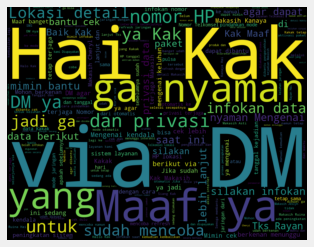

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=900, height=700, random_state=21, max_font_size=500).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
pip install WordCloud

In [10]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Siap, Kak. Mimin cek DM Kakak sudah masuk ant...",1.000000,0.500000,Positive
1,@13umx Siang Kak. Silakan ada yang bisa dibant...,1.000000,0.500000,Positive
2,"Baik, Kak. Mimin cek DM nya sudah masuk antri...",1.000000,0.500000,Positive
3,"Kirim via DM ya, agar dapat dibantu pengecekk...",1.000000,0.500000,Positive
4,"Hai, Kak. Maaf ya jadi ga nyaman. Mengenai ke...",0.000000,0.000000,Neutral
...,...,...,...,...
195,"3. Lakukan logout, clear cache, clear data da...",0.588889,0.233333,Positive
196,"Hai, Kak. Maaf ya jadi ga nyaman. Apakah kelu...",0.000000,0.000000,Neutral
197,"Baik, Kak Ira. Mengenai informasi tersebut, m...",1.000000,0.500000,Positive
198,"78 Jika sudah dan tetap sama, yuk infoin nomor...",1.000000,0.500000,Positive


In [11]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  Siap, Kak. Mimin cek DM Kakak sudah masuk antrian. Mohon berkenan menunggu interaksi selanjutnya via DM ya. Makasih :) -Asti

2) @13umx Siang Kak. Silakan ada yang bisa dibantu seputar produk dan layanan Telkomsel Kak? Tks :) -Rayan

3)  Baik, Kak. Mimin cek DM nya sudah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Kanaya

4)  Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

5) _ Hai, Kak. Maaf ya jadi ga nyaman. Mengenai kendala jaringan yang menyebabkan akses internet lambat, mimin infokan saat ini sedang ada peningkatan sistem layanan kami. Diupayakan bisa selesai secepatnya ya, Kak. Makasih untuk tetap menggunakan Telkomsel :) -Ruina

6) _   mohon infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

7) 68 Halo, Kak Tiffany. Mengenai bukti isi ulang, Kakak juga bi

In [12]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) _ Duh, maaf ya Kak :( Mengenai Paket Combo Sakti merupakan Paket Promo ya Kak. Telkomsel memberikan penawaran secara personal sesuai dengan profile masing-masing pelanggan berdasarkan lama berlangganan dan rata-rata penggunaan dalam periode waktu yang telah ditentukan. (1/2)

2)  Hai, Kak. Maaf banget udah dibuat ga nyaman. Mengenai kendala ga bisa aktivasi paket dengan keterangan pembayaran dalam proses, silakan infokan data berikut via DM agar dibantu cek lebih lanjut dan privasi data Kakak tetap terjaga: (1/2)

3)   Siang, Kak. Makasih ya udah berkenan menunggu. Terkait kendala pembelian paket data Telkomsel melalui aplikasi Shopee yang Kakak alami. Silakan infokan data berikut via DM ya agar dapat mimin bantu cek dan privasi data terjaga: (1/2)

4)  Hai, Kak Yahya. Maaf ya udah bikin ga nyaman. Apabila Kakak mengalami kendala pada saat melakukan pembelian paket, silakan infokan data berikut via DM ya agar dapat mimin bantu cek dan privasi data terjaga:

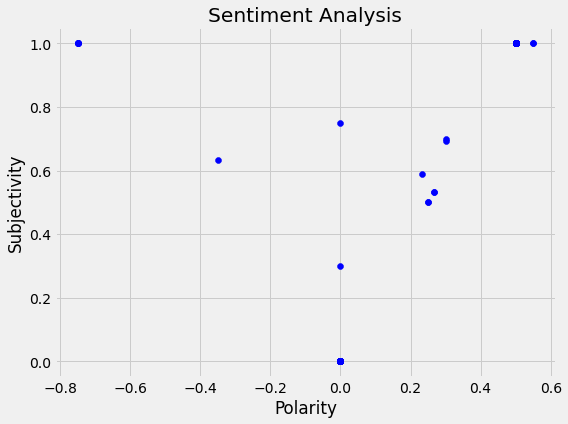

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [14]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

75.5

In [15]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

3.5

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Positive    151
Neutral      42
Negative      7
Name: Analysis, dtype: int64

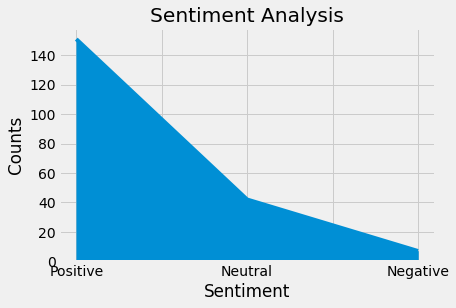

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

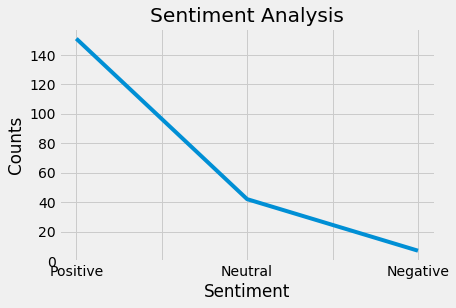

In [18]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()